Membaca data dari file ubyte MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# function untuk konversi dari ubyte menjadi file TXT
def convert(img_file, label_file, txt_file, n_images):
  print("\nOpening binary pixels and labels files ")
  lbl_f = open(label_file, "rb")   # labels (digits)
  img_f = open(img_file, "rb")     # pixel values
  print("Opening destination text file ")
  txt_f = open(txt_file, "w")      # output to write to

  print("Discarding binary pixel and label headers ")
  img_f.read(16)   # discard header info
  lbl_f.read(8)    # discard header info

  print("\nReading binary files, writing to text file ")
  print("Format: 784 pixels then labels, tab delimited ")
  for i in range(n_images):   # number requested 
    lbl = ord(lbl_f.read(1))  # Unicode, one byte
    for j in range(784):  # get 784 pixel vals
      val = ord(img_f.read(1))
      txt_f.write(str(val) + "\t") 
    txt_f.write(str(lbl) + "\n")
  img_f.close(); txt_f.close(); lbl_f.close()
  print("\nDone ")

# function untuk menunjukan gambar dari file txt
def display_from_file(txt_file, idx):
  all_data = np.loadtxt(txt_file, delimiter="\t",
    usecols=range(0,785), dtype=np.int64)

  x_data = all_data[:,0:784]  # all rows, 784 cols
  y_data = all_data[:,784]    # all rows, last col

  label = y_data[idx]
  print("digit = ", str(label), "\n")

  pixels = x_data[idx]
  pixels = pixels.reshape((28,28))
  for i in range(28):
    for j in range(28):
      # print("%.2X" % pixels[i,j], end="")
      print("%3d" % pixels[i,j], end="")
      print(" ", end="")
    print("")

  plt.tight_layout()
  plt.imshow(pixels, cmap=plt.get_cmap('gray_r'))
  plt.show()  

In [39]:
convert("dataset/train-images.idx3-ubyte", "dataset/train-labels.idx1-ubyte", "dataset/trainSet.txt", 60000)


Opening binary pixels and labels files 
Opening destination text file 
Discarding binary pixel and label headers 

Reading binary files, writing to text file 
Format: 784 pixels then labels, tab delimited 

Done 


digit =  3 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  47 156 205 254 255 112   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  53 208 245 253 253 253 240 249  50   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   1  73 242 248 212 128  56  56 122 253  94   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 101 253 211  64   0   0   0   0  66 253 212   0   0   0   0

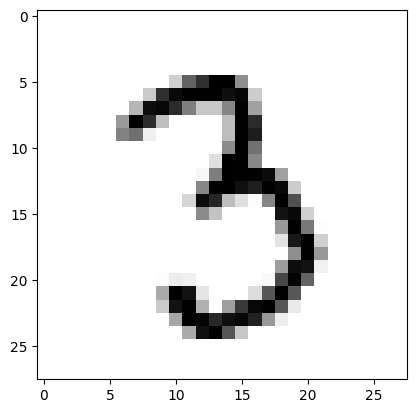

In [6]:
display_from_file("dataset/trainSet.txt", 30000)

Membuat dataset MNIST dari file txt

In [7]:
import torch
import numpy as np

class MNIST_Dataset(torch.utils.data.Dataset):
  # 784 tab-delim pixel values (0-255) then label (0-9)
  def __init__(self, src_file, transform = None):
    all_xy = np.loadtxt(src_file, usecols=range(785),
      delimiter="\t", comments="#", dtype=np.float32)

    self.transform = transform
    tmp_x = all_xy[:, 0:784]  # all rows, cols [0,783]
    tmp_x /= 255
    tmp_x = tmp_x.reshape(-1, 1, 28, 28)
    tmp_y = all_xy[:, 784]

    self.x_data = \
      torch.tensor(tmp_x, dtype=torch.float32)
    self.y_data = \
      torch.tensor(tmp_y, dtype=torch.int64)
     

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    lbl = self.y_data[idx]  # no use labels
    pixels = self.x_data[idx]

    if self.transform:
      pixels = self.transform(pixels) 
    return (pixels, lbl)

Visualisasi Data dari setiap kelas

In [8]:
# load dataset
ds = MNIST_Dataset("dataset/trainSet.txt")

images = []
classes = []
for data in ds:
    pixels, lbl = data
    if not lbl in classes:
        images.append(pixels)
        classes.append(lbl)
        print(f"appending class {lbl}")
    if len(classes) == 10:
        print("done getting examples")
        break


appending class 5
appending class 0
appending class 4
appending class 1
appending class 9
appending class 2
appending class 3
appending class 6
appending class 7
appending class 8
done getting examples


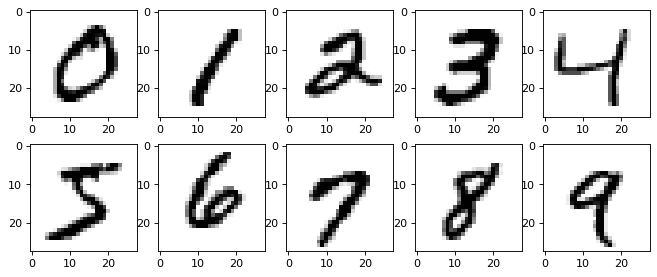

In [19]:
# ukuran dari gambar
width = 28
height = 28

# siapkan figure
fig = plt.figure(figsize=(10, 4), dpi=80)
columns = 5
rows = 2

# printing image ke figure
for i in range(1, columns*rows +1):
    pixels = images[i - 1]
    lbl = classes[i-1].item()
    pixels = pixels.reshape((width, height))
    fig.add_subplot(rows, columns, lbl +1)
    plt.imshow(pixels, cmap=plt.get_cmap('gray_r'))

plt.show()

Jumlah Data setiap Kelas

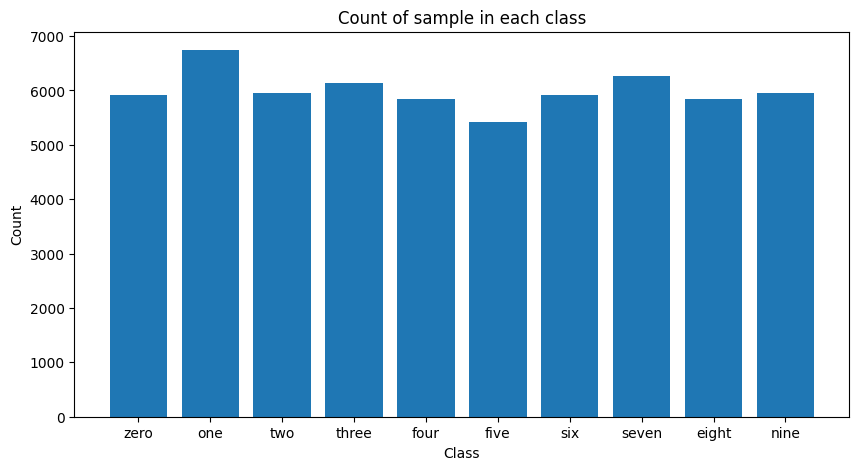

In [38]:
count = [0 for x in range(0, 10)]
classes = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for _,lbl in ds:
    count[lbl.item()] += 1

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(classes, count)
ax.set_ylabel("Count")
ax.set_xlabel("Class")
ax.set_title("Count of sample in each class")
plt.show()